# New York City Airbnb Open Data 

## Table of Content
1. [Introduction](#Introduction)
    1. [Data Description](#Data_Description)
    2. [Colulmns Description](#Columns_Description)
    3. [Project Onjective](#Project_Objective)
2. [Fetching Data](#Fetching_Data)
3. [Data Cleaning](#Data_Cleaning)
4. [Summary](#Summary)
    1. [Summary statistics for object attributes](#Summary_Object)
    2. [Summary statistics for numeric attributes](#Summary_Numeric)
5. [EDA](#EDA)
    1. [Histograms](#Histograms)
    2. [Correlation](#Correlation)
    3. [Pairplots](#Pairplots)
    4. [Making new variable *center_distance*](#Making_new_variable)
6. [Regression Models](#Regression_Models)
    1. [Linear Regression](#Linear_Regression)
    2. [RidgeCV](#RidgeCV)
    3. [LassoCV](#LassoCV)
    4. [ElasticNetCV](#ElasticNetCV)
    5. [Polinomial Features](#PolinomialFeatures)
7. [Conclusion](#Conclusion)
    


<a id="Introduction"></a>

## 1. Introduction

<a id="Data_Description"></a>

### Data Description

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. <br><br>
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions. The dataset can be found on the [Kaggle website](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)<br><br>
This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

<a id="Columns_Description"></a>

### Columns Description 

- *id* - listing ID
- *name* - name of the listing
- *host_id* - host ID
- *host_name* - name of the host
- *neighbourhood_group* - location
- *neighbourhood* - area
- *latitude* - latitude coordinates
- *longitude* - longitude coordinates
- *room_type* - listing space type
- *price* - price in dollars
- *minimum_nights* - amount of nights minimum
- *number_of_reviews* - number of reviews
- *last_review* - latest review
- *reviews_per_month* - number of reviews per month
- *calculated_host_listings_count* - amount of listing per host
- *availability_365* - number of days when listing is available for booking

<a id="Project_objective"></a>

### Project Objective

The task is to predict rent. This is a regression problem. We are to try Linear Regression, RidgeCV, LassoCV and ElasticNetCV models. 

<a id="Fetching_Data"></a>

## 2. Fetching Data

In [1]:
import os
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

In [2]:
filename = 'AB_NYC_2019.csv'
if os.path.exists(filename):
    df = pd.read_csv(filename)
else:
    print('File %s not found' % filename) 

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

<a id ="Data_Cleaning"></a>

## 3. Data Cleaning

There are 48895 entries with 16 columns. We are to exclude *id*, *name*, *host_id*, *host_name*, *last_review*. <br>
There are null objects in *reviews_per_month* column. Let's see *reviews_per_month* and *number_of_reviews* statistics to learn what value may be used to replace NaNs in *reviews_per_month* column.

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Min value of *number_of_reviews* is 0. However min value of *reviews_per_month* is 0.01.<br>
The first quartile of *reviews_per_month* is 0.19, the first quartile of *number_of_reviews* is 1. The median of *reviews_per_month* is 0.72, of *number_of_reviews* is 5. Thus in general number of rewiews and number of reviews per month are rather low. Let's substitute NaNs of *reviews_per_month* with 0.

In [8]:
data = df.drop(columns = ['id', 'name', 'host_id', 'host_name', 'last_review']).fillna(0)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


<a id="Summary"></a>

## 4. Summary

<a id = "Summary_object"></a>

### Summary statistics for object attributes

In [10]:
# summary statistics for object attribute
data.describe(include = ['O'])

,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21661,3920,25409


 So we have 3 object features. *Neighbourhood* has maximum number of unique categories i.e. 221 categories. <br>
 Let's list all unique values and their count in all object columns. 

In [11]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
neigh_counts = data['neighbourhood'].value_counts()
neigh_counts

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
Woodrow                  1
Willowbrook              1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

In [13]:
neigh_counts[neigh_counts < 1000]

Lower East Side       911
Astoria               900
Washington Heights    899
West Village          768
Financial District    744
                     ... 
Richmondtown            1
Fort Wadsworth          1
Woodrow                 1
Willowbrook             1
New Dorp                1
Name: neighbourhood, Length: 208, dtype: int64

In [14]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

`Bronx` value of *neighbourhood_group* column is rather rare (2.23%). So does `Staten Island` value(0.76%).<br>
There are 208 *neighbourhood* values out of 221 unique values which are met less than 1000 i.e. less than 2%. So *neighbourhood* feature has long tail.<br>
The count of `Shared room` value of *room_type* column is small (2.37%). 

<a id = "Summary_Numeric"></a>

### Summary statistics for numeric attributes

In [15]:
# summary statistics for numeric attribute
data.describe(include = [np.number])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*Lattitude* and *longitude* valules are not informative. Better results may be obtained by *center_distance* feature (distance to city centre) and may be by *metro_distance* (distance to metro or other high-usage transport). Rooms that are farther from the metro stations are used to cost less. *Metro_distance* is more difficult to obtain. In warm coastal cities distance to beaches matters. <br> <br>
For *price* the difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 175 (75% percentile). The same is true for other numeric features: *minimum_nights*, *number_of_reviews*, *reviews_per_month*, *calculated_host_listings_count*, *availability_365*. After 75% percentile their values rise very quickly. So all numeric features except *longitude* and *latitude* are right skewed. <br><br>
Maximum value in *minimum_nights* column is 1250 which is about 3.4 years and that's queer. May be it's an error in data? Anyway we won't change anything in that colulmn. Let's list all data with *minimum_nights* value greater than 180 (approximately 6 months).

In [16]:
mn_counts = data['minimum_nights'].value_counts()
mn_counts [mn_counts.index > 180]

365     29
300      6
500      5
360      5
200      4
999      3
240      3
270      2
181      2
210      2
225      1
354      1
1250     1
198      1
480      1
250      1
400      1
185      1
184      1
183      1
182      1
275      1
370      1
222      1
366      1
299      1
186      1
265      1
1000     1
364      1
Name: minimum_nights, dtype: int64

<a id="EDA"></a>

## 5. EDA

<a id = "Histograms"></a>

### Histograms

#### Price

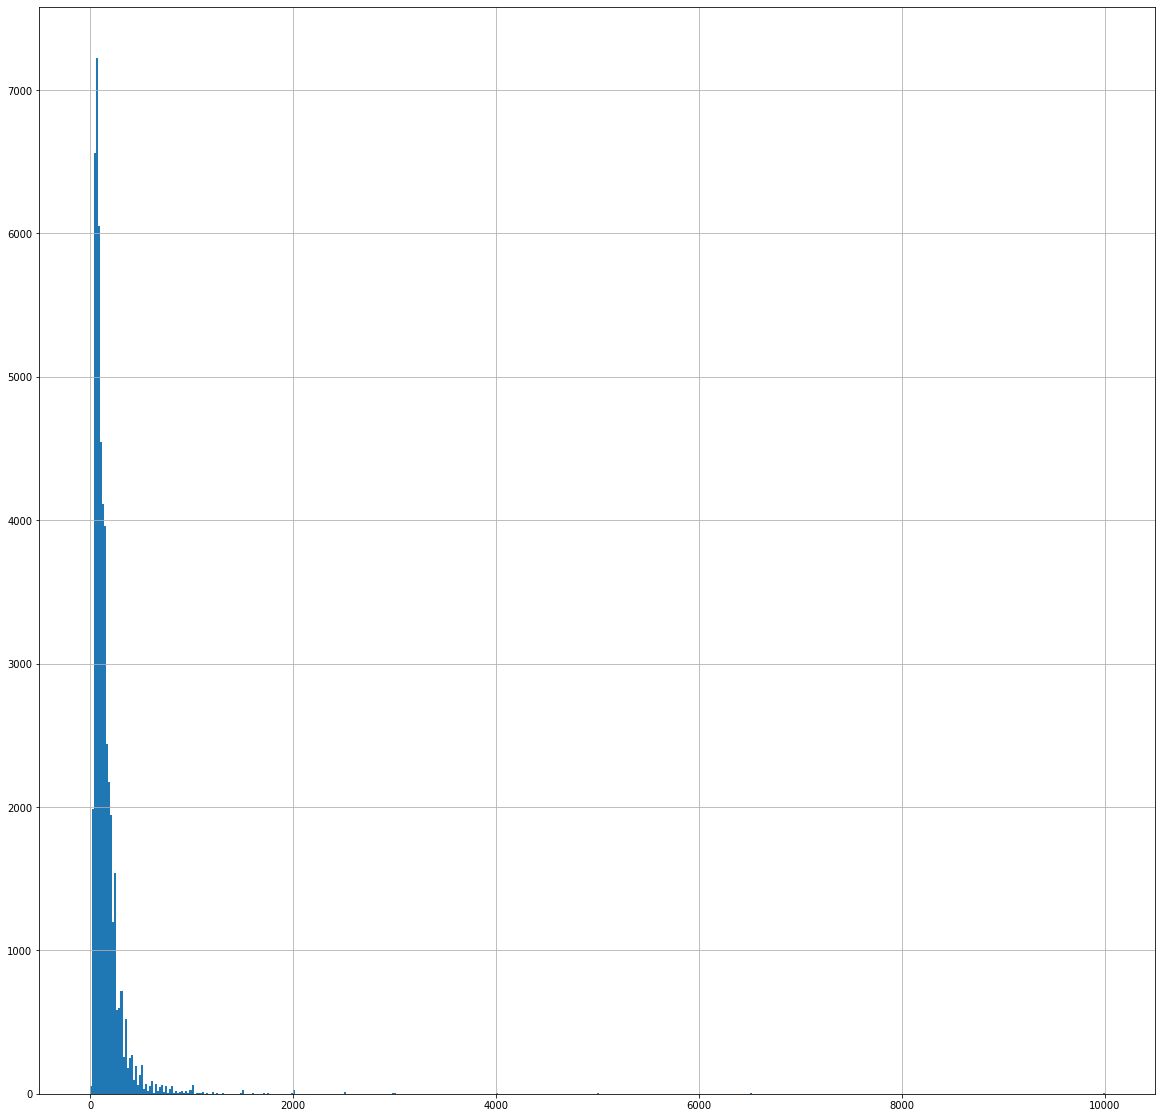

In [17]:
data['price'].hist(figsize=(20,20),  bins = 500)
plt.show()

In [18]:
data[data['price'] > 600].shape

(778, 11)

The above histogram shows that:
- *price* attribute is not symmetric
- it is right-skewed
- the dataset has fewer observations (778) of flats with price more than `600`. Expensive offers are met more seldom as to law of supply and demand.

#### Minimum_nights

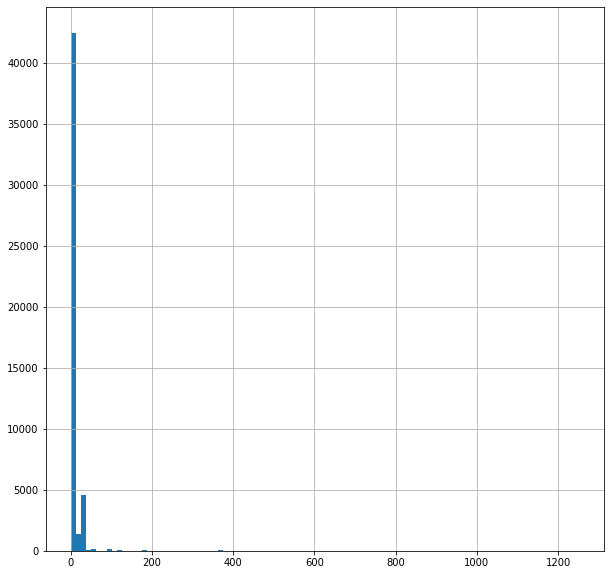

In [19]:
data['minimum_nights'].hist(figsize=(10, 10), bins = 100)
plt.show()

In [20]:
data[data['minimum_nights'] > 30].shape

(747, 11)

The above histogram shows that:
- *minimum_nights* varies within the range of 1 to 1250
- *minimum_nights* attribute is not symmetric
- it is right-skewed. 
- the dataset has fewer observations (747) of flats with minimum nights count more than `30`. Most of the flats are for short-term rental.

#### Number_of_reviews

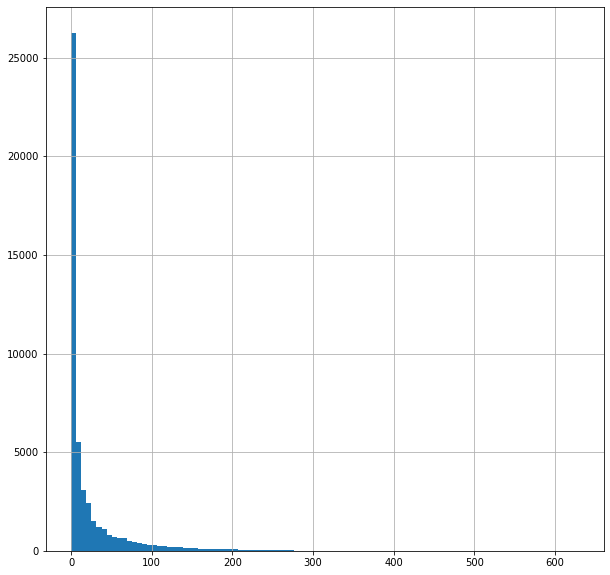

In [21]:
data['number_of_reviews'].hist(figsize=(10, 10), bins = 100)
plt.show()

The above histogram shows that:  
- *number_of_reviews* attribute is not symmetric
- it is right-skewed
- there are few flats with more than 200 reviews in the dataset.

#### Reviews_per_month

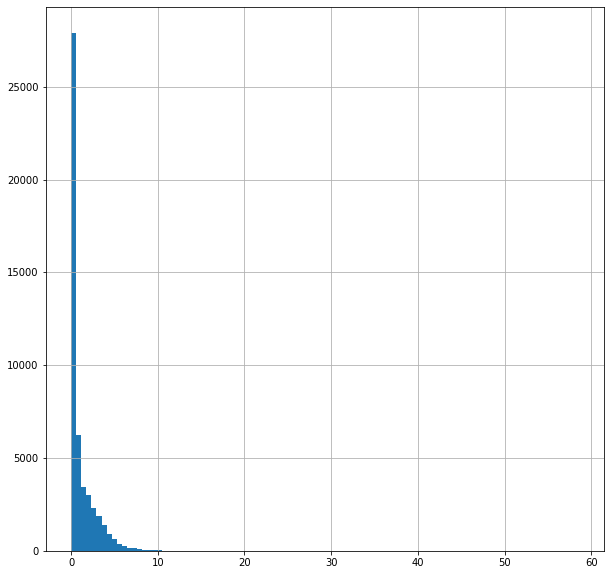

In [22]:
data['reviews_per_month'].hist(figsize=(10, 10), bins = 100)
plt.show()

In [23]:
data[data['reviews_per_month'] > 7].shape

(435, 11)

The above histogram shows that:  
- *reviews_per_month* attribute is not symmetric
- it is right-skewed
- there are few flats with more than 7 reviews per month in the dataset. Apparently this column values were computed (float values in the column point to that). It is curious how one flat may receive more than 30 reviews per month. Really strange computations!

#### Calculated_host_listings_count

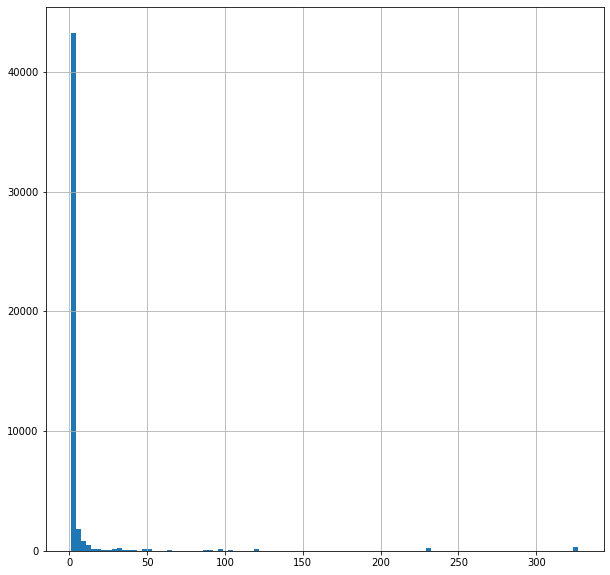

In [24]:
data['calculated_host_listings_count'].hist(figsize=(10, 10), bins = 100)
plt.show()

In [25]:
data[data['calculated_host_listings_count'] > 1].shape

(16592, 11)

The above histogram shows that:
- *reviews_per_month* is not symmetric
- it is right-skewed
- about 66% of hosts have only one listing.

#### Availability_365

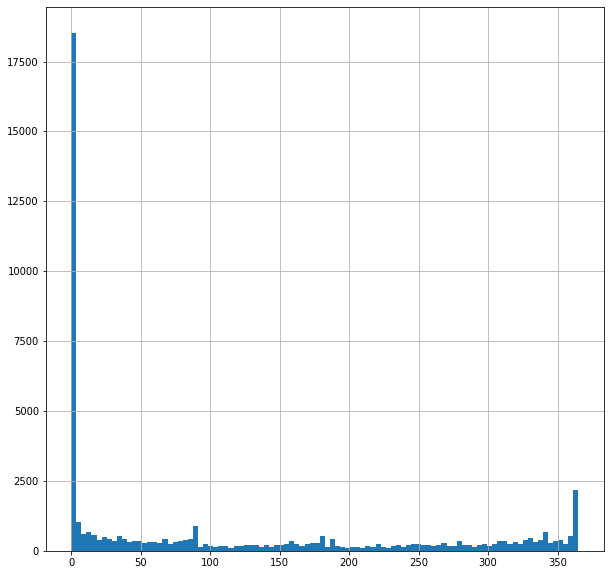

In [26]:
data['availability_365'].hist(figsize=(10, 10), bins = 100)
plt.show()

In [27]:
data[data['availability_365'] < 1].shape

(17533, 11)

The above histogram shows that:
- *availability_365* is not symmetric
- it is right-skewed
- about 35.86% of listings are not available (*availability_365* = `0`). There are two possibilities: first, that the host just closed the listing for booking; second, the listing is super popular.

#### Neighbourhood_group

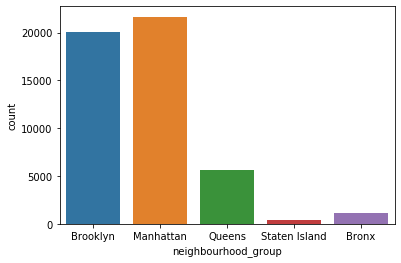

In [28]:
sns.countplot(x = 'neighbourhood_group', data = data)
plt.show()

The histogram shows that:
- *neighbourhood_group* attribute has 5 unique categories
- two of them are dominate over other categories(Brooklyn and Manhattan)
- Staten Island has minimum number of observations.

#### Neighbourhood

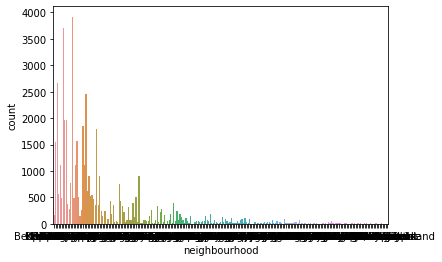

In [29]:
sns.countplot(x = 'neighbourhood', data = data)
plt.show()

Great amount of unique categories makes it difficult to analyse it via histogram. It's clear that a low count of neighbouhoods have rather big values. The larger part of neighbourhoods are combined into a long tail.

#### Room_type

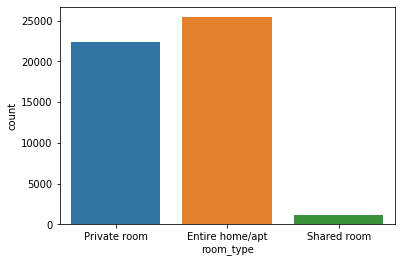

In [30]:
sns.countplot(x = 'room_type', data = data)

The histogram shows that:
 - there are 3 unique categories
 - shared room has minimum samples in *room-type* attribute (may be because of its low popularity).

<a id = "Correlation"></a>

### Correlation

In [31]:
corr_matrix = data.corr()

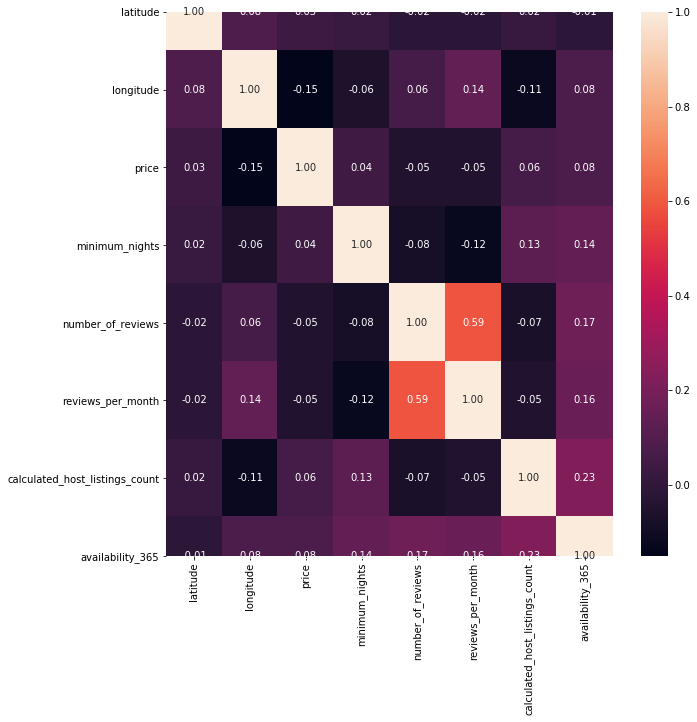

In [32]:
plt.figure(figsize=(10,10));
sns.heatmap(corr_matrix, annot=True, fmt='.2f');

From the figure above we can see that correlation coeffs between parameters are rather low. The biggest one (0.59) is between *reviews_per_month* and *number_of_reviews*. 

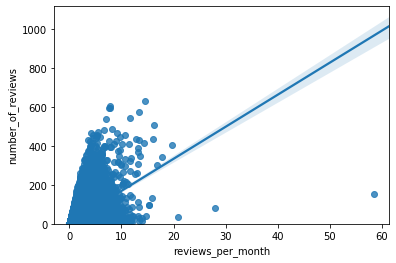

In [33]:
sns.regplot(x='reviews_per_month', y='number_of_reviews', data=data) 
plt.ylim(0,);
plt.show()

<a id = "Pairplots"></a>

### Pairplots

Let's create a pairlot for our data excluding *latitude* and *longitude* variables, since their values aren't useful here.

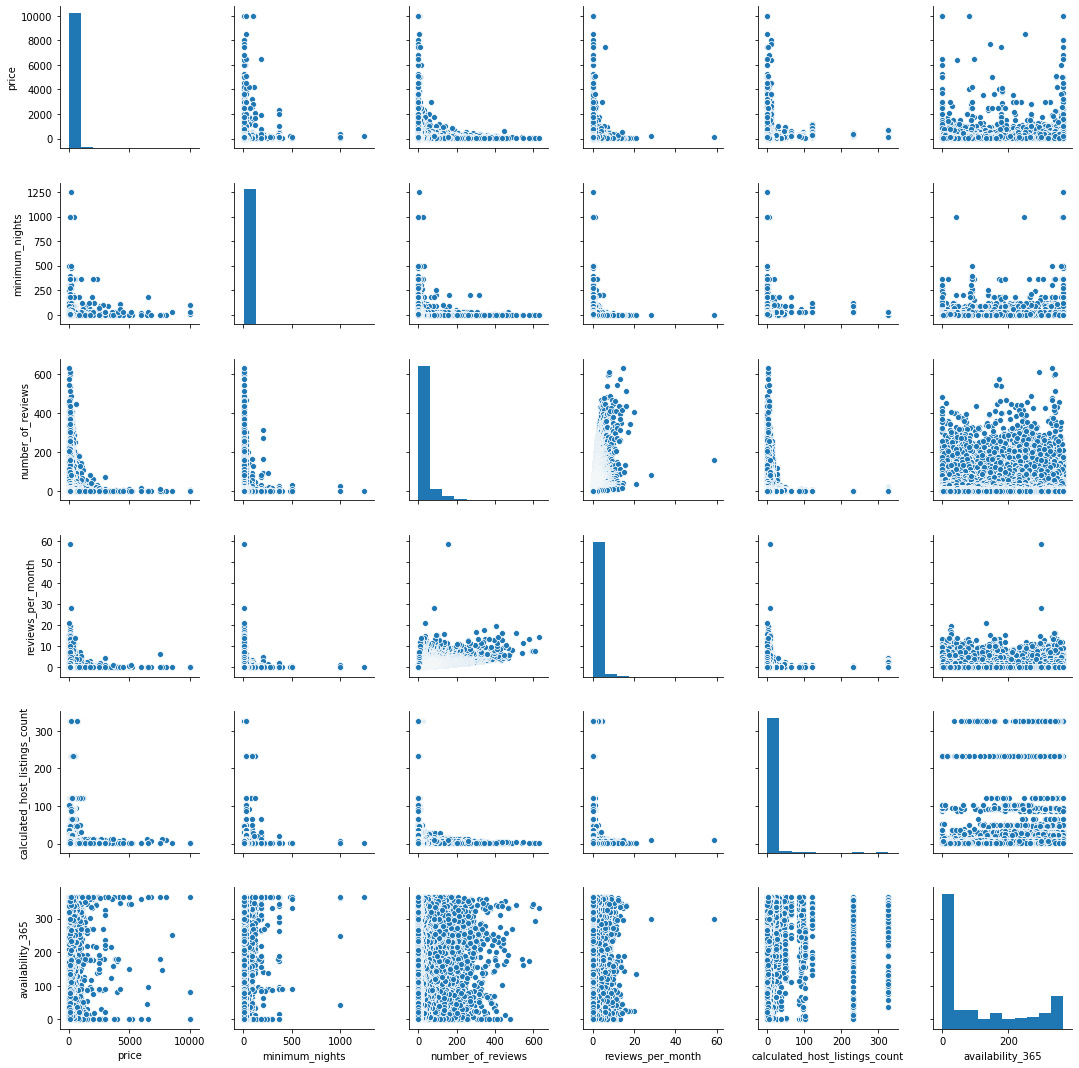

In [34]:
sns.pairplot(data.drop(columns=['latitude', 'longitude']))

Let's assign *neighbourhood_group* class label to our plots. 

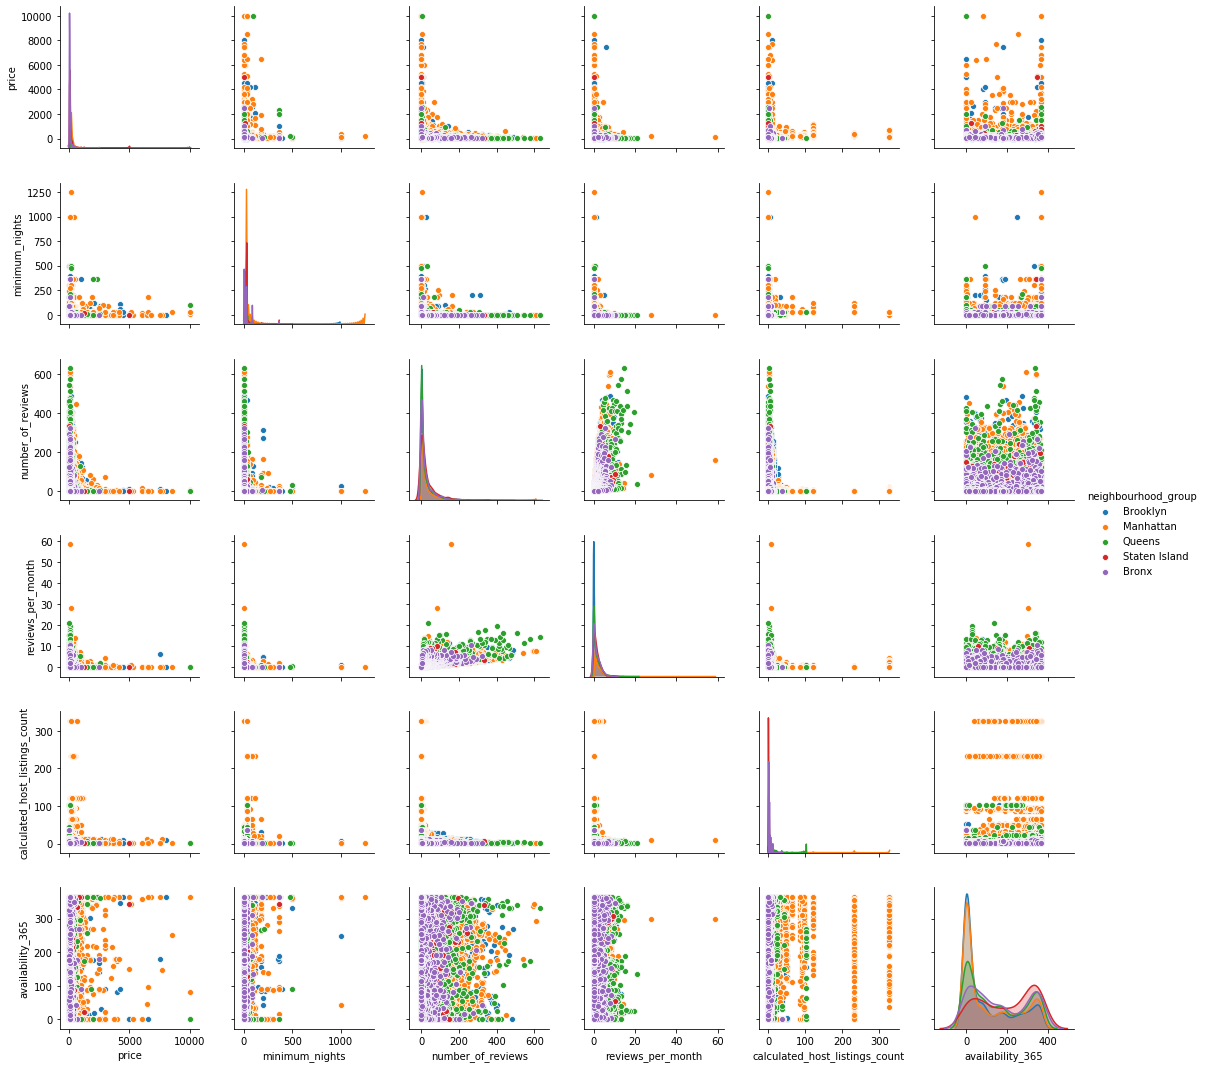

In [35]:
sns.pairplot(data.drop(columns=['latitude', 'longitude']), hue='neighbourhood_group')

Some conclusions:
- *calculated_host_listing_count* feature has lowest values for `Bronx` and `Queens` regardless to other numerical features. This feature has maximum values for `Manhattan` listings.
- *price*, *minimum_nights*, *number_of_reviews*, *reviews_per_month* and *calculated_host_listings_count* have minimum values for `Bronx` listings. I don't think this is associated with `Bronx` listings fewer quantity in dataset. 
- *number_of_reviews* has maximum values for `Queens` listings.
- *price* values are higher for `Manhattan` and `Brooklyn` as expected.
- *reviews_per_month* values are higher for `Queens` listings. 
- *availability_365* is the same for all neighbourhood groups. 

Let's assign *room_type* class label to our plots. 

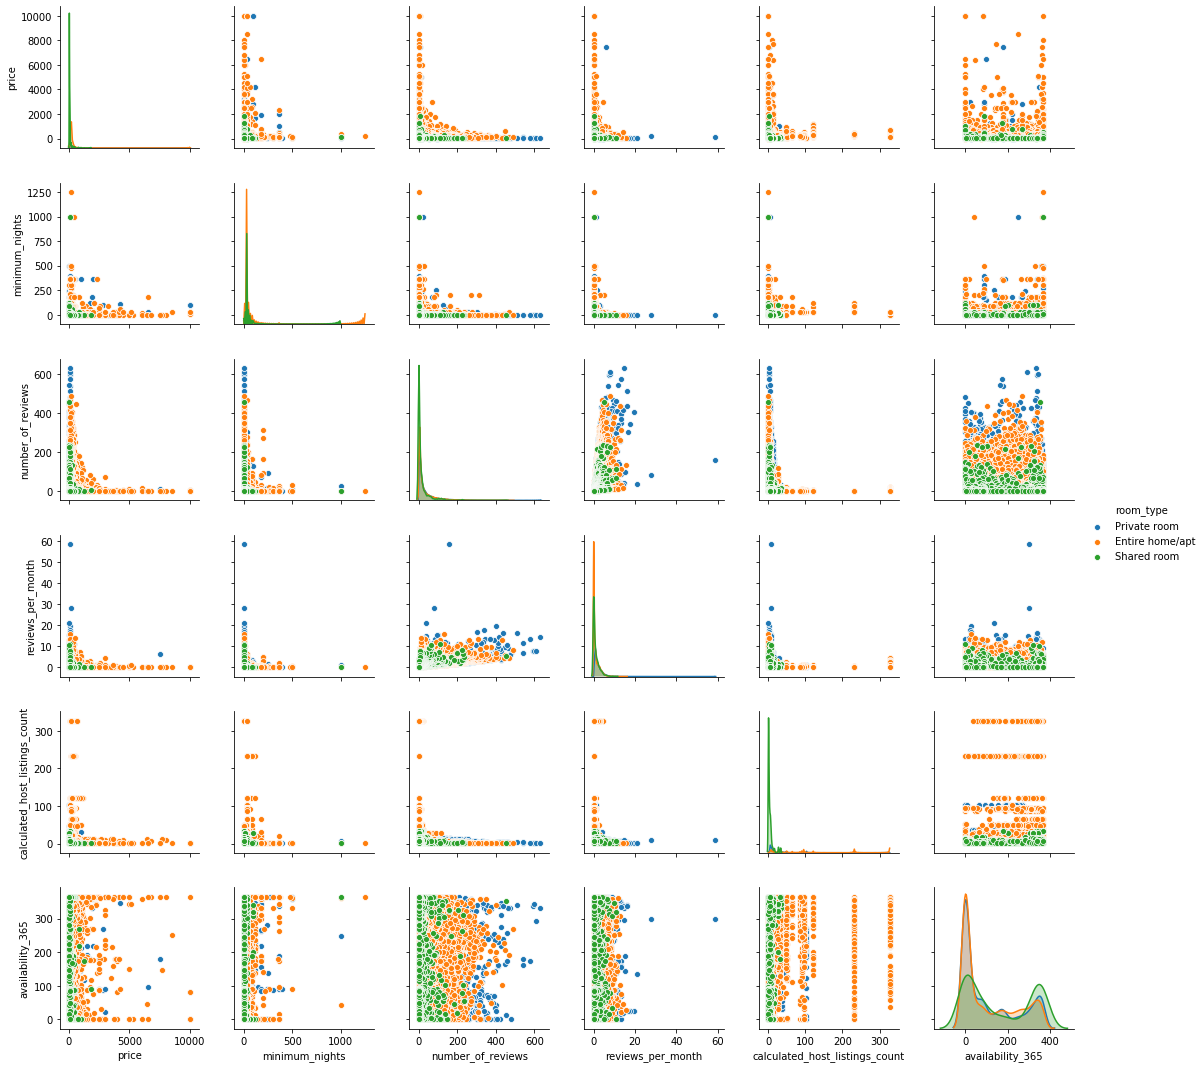

In [36]:
sns.pairplot(data.drop(columns=['latitude', 'longitude']), hue='room_type')

Some conclustions:
- *calculated_host_listing_count* has maximum values for `Entire home/app`
- *price* is higher for `Entire home/app` as expected
- *price*, *minimum_nights*, *number_of_reviews*, *reviews_per_month*, *calculated_host_listings_count* features have minimum values for `Shared room` listings. May be it's because there are not so much `Shared rooms`. I mean, they have lower popularity and cost cheaper so there are not so much shared rooms because hosts do want to get more money. That's why reviews count is smaller.
- *number_of_reviews*, *reviews_per_month* have maximum values for `Private room` listings.
- *availability_365* is the same for all room types.

<a id="Making_new_variable"></a>

### Making new variable *center_distance*

Let's consider The Great Lawn of Central Park with coordinates `(40.781354, -73.966527)` be the center of New York. 

In [37]:
import math

def haversine(coord1, coord2):
    R = 6371000  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [38]:
data['center_distance'] = 0

In [39]:
for ind in data.index:
    data.set_value(ind, 'center_distance', haversine([data['latitude'][ind], data['longitude'][ind]], [40.781354, -73.966527]))

C:\Users\dinak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [40]:
data['center_distance'].describe()

count    48895.000000
mean      8078.800245
std       4693.411511
min        451.000000
25%       4389.000000
50%       7492.000000
75%      10950.000000
max      38934.000000
Name: center_distance, dtype: float64

In [41]:
data[data['center_distance'] == 451]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance
15967,Manhattan,Upper West Side,40.78397,-73.97063,Entire home/apt,90,8,1,0.03,1,0,451


In [42]:
data[data['center_distance'] == 38934]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance
14119,Staten Island,Tottenville,40.49979,-74.24084,Private room,110,2,0,0.0,1,364,38934


According to Google Maps search results for *latitude* and *longitude* values above, *center_distance* seems to be correct. Let's exclude *latitude* and *longitude* from our dataframe. 

In [43]:
data = data.drop(columns = ['latitude', 'longitude'])

In [44]:
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,8078.800245
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,4693.411511
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,451.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,4389.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,7492.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,10950.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,38934.000000


Let's explore whether new variable affects the plots we've already created.

In [45]:
corr_matrix = data.corr()

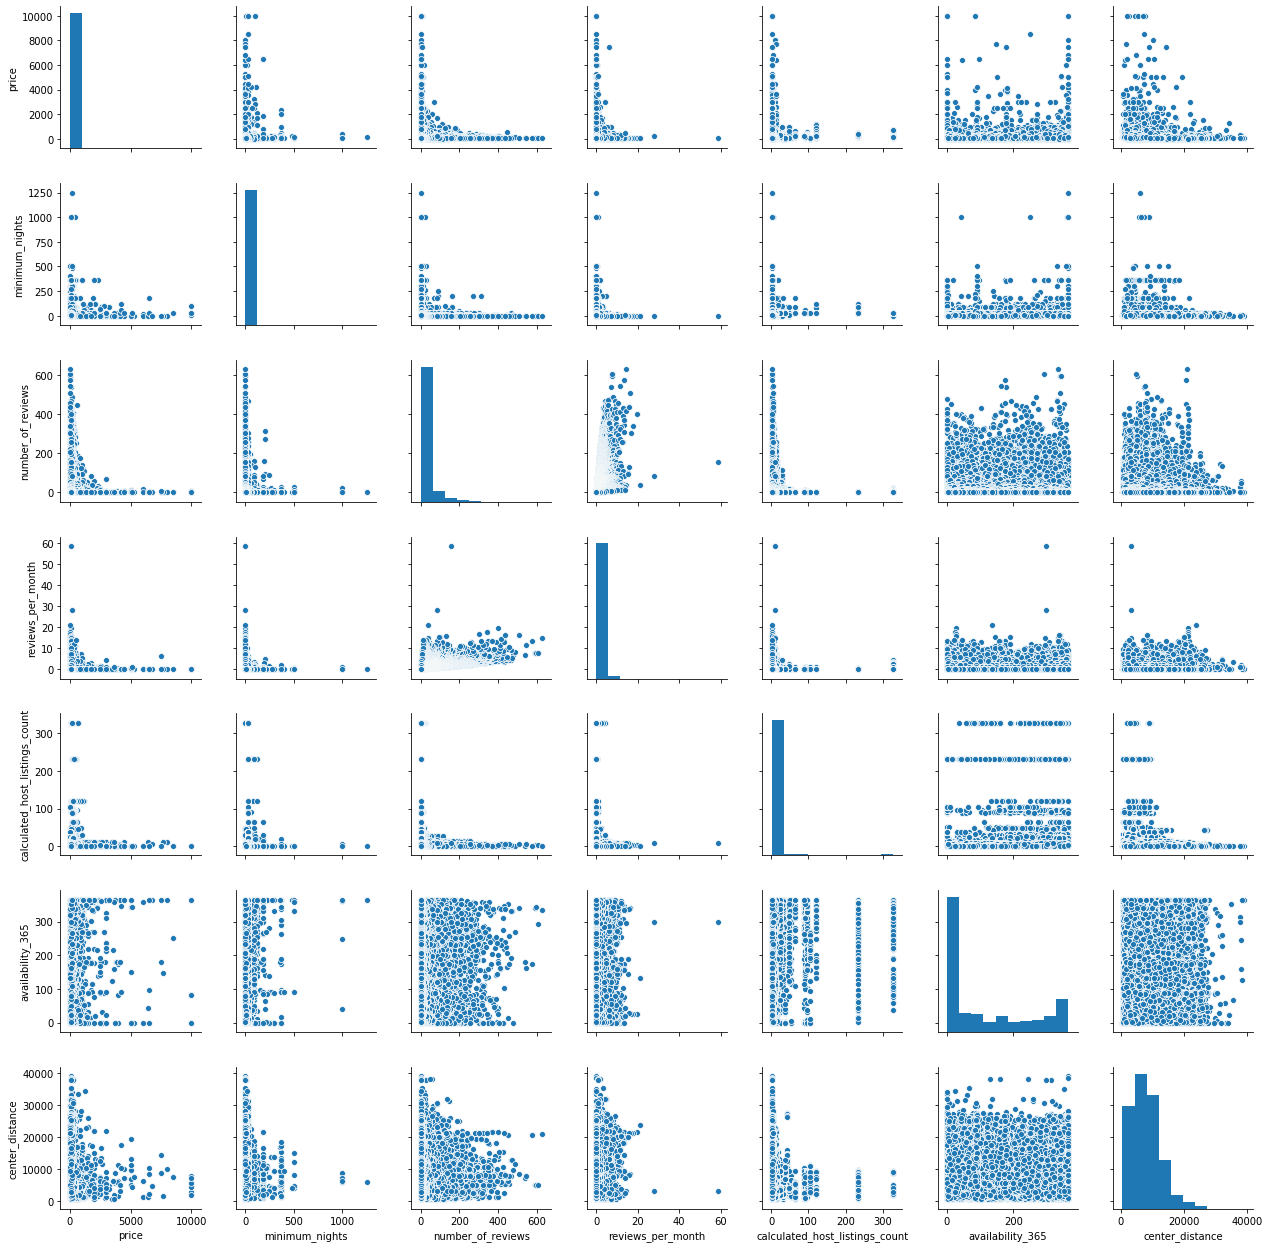

In [46]:
sns.pairplot(data)

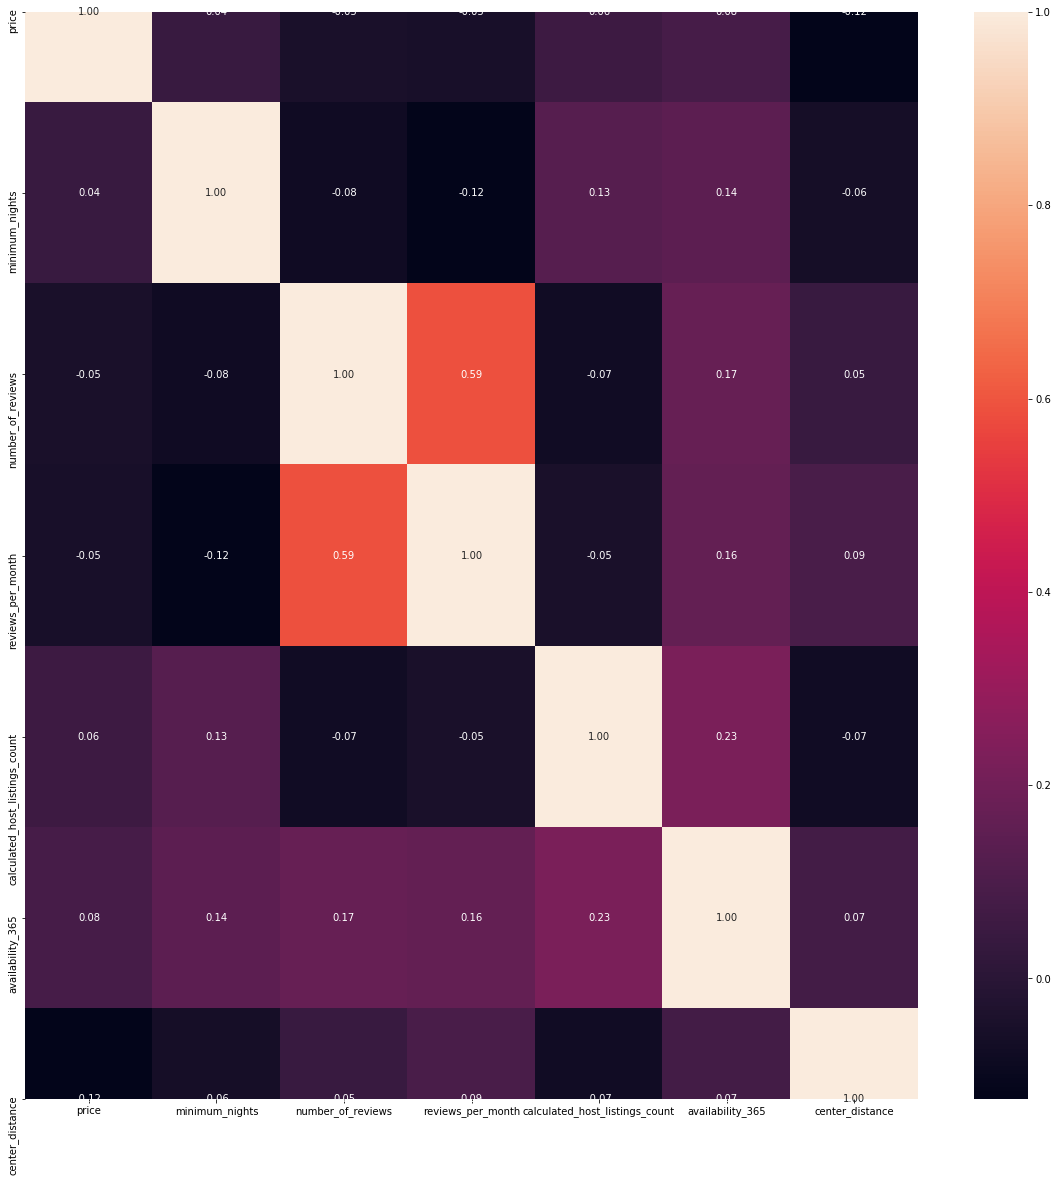

In [47]:
plt.figure(figsize=(20,20));
sns.heatmap(corr_matrix, annot=True, fmt='.2f');

There isn't any new information after *center_distance* including.

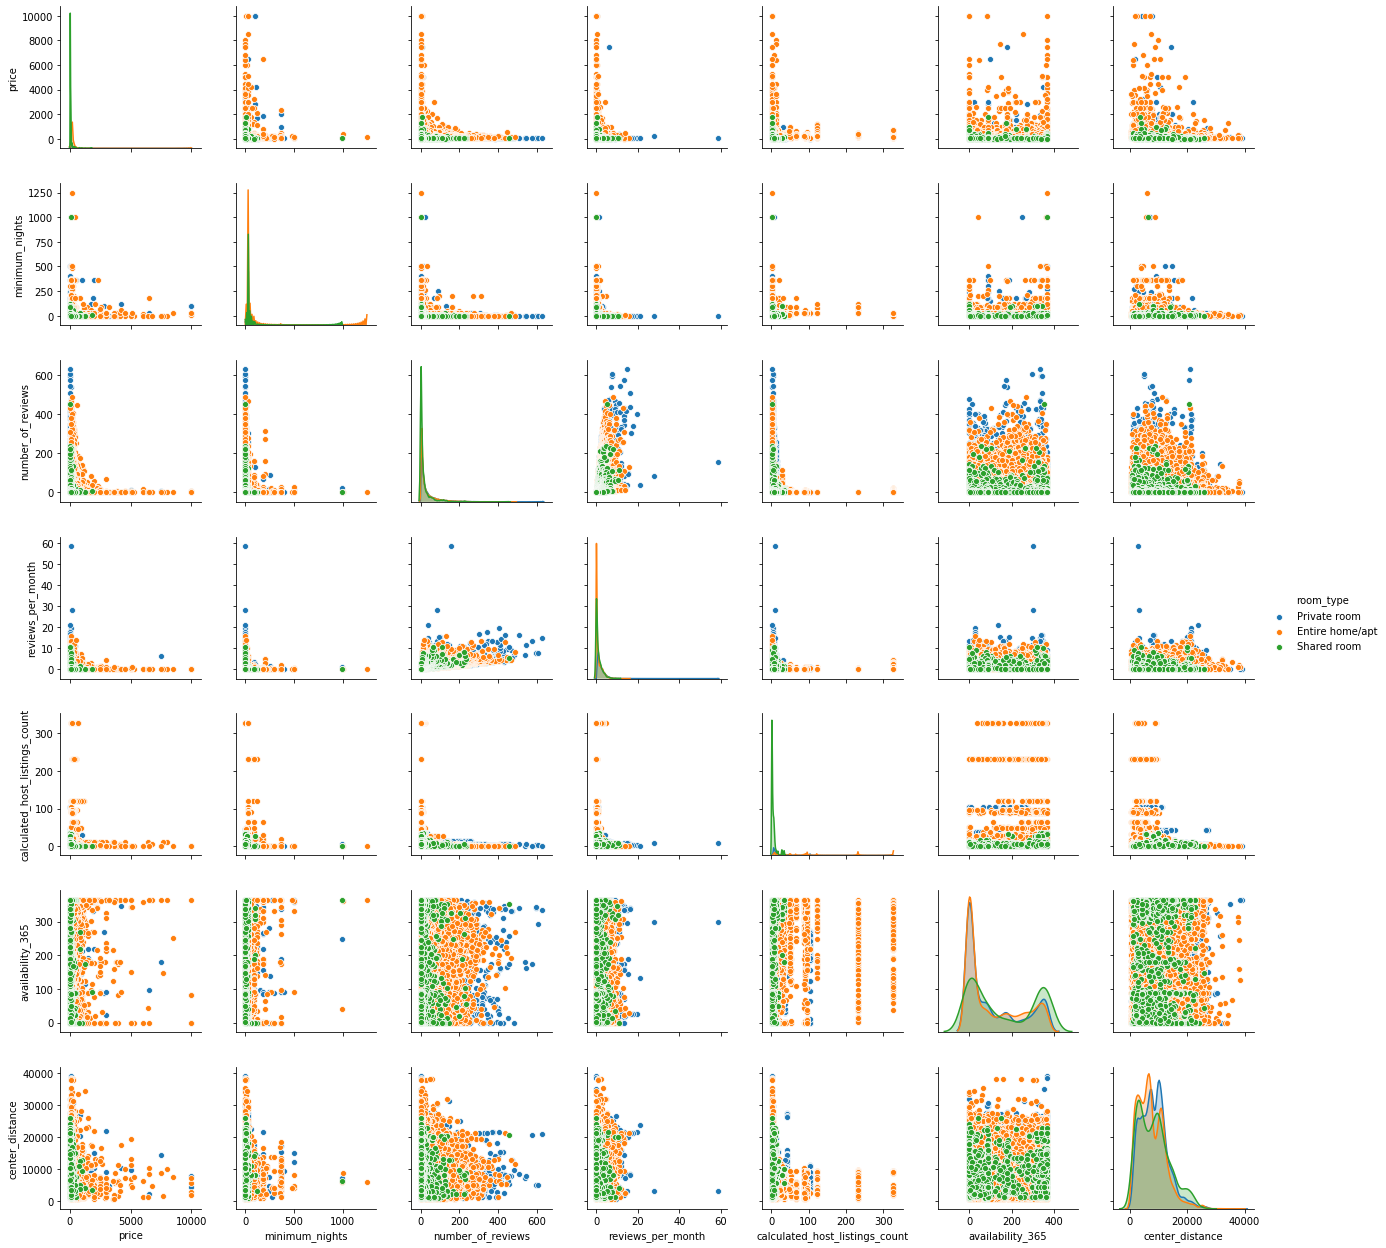

In [48]:
sns.pairplot(data, hue='room_type')

There isn't any new information after *center_distance* including. According to histogram in right low corner above *center_distance* doesn't depend on room_type.

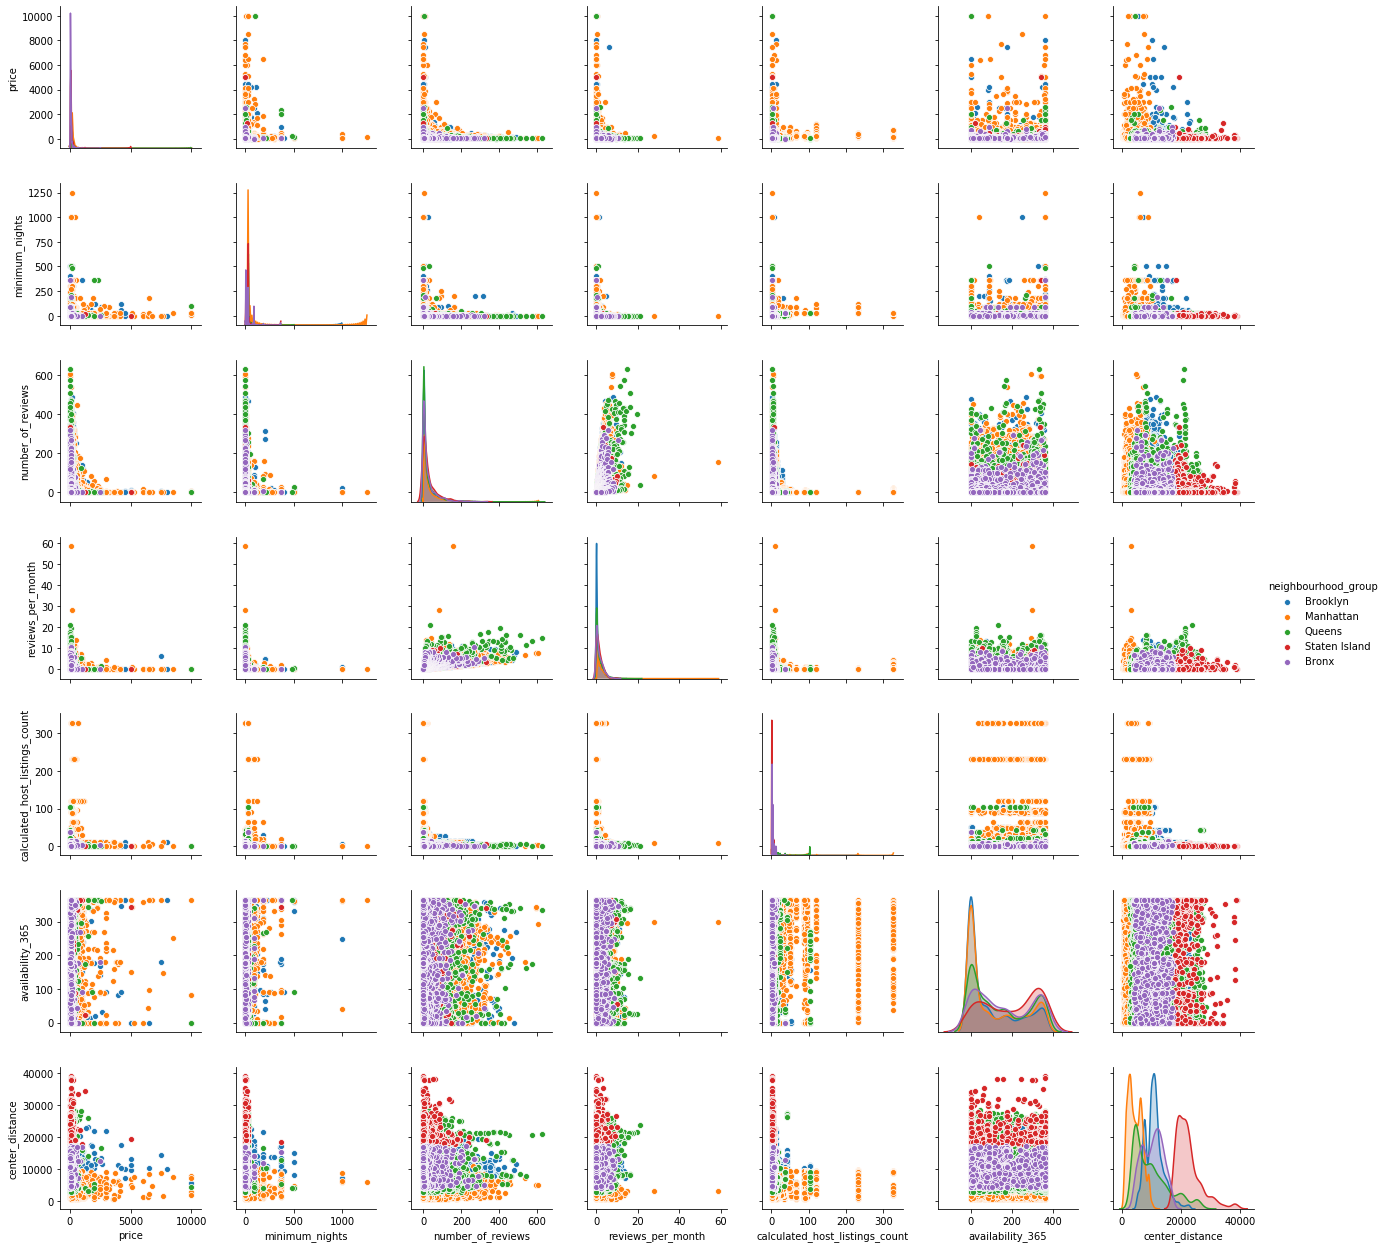

In [49]:
sns.pairplot(data, hue='neighbourhood_group')

`Staten Island` listings are the farthest from the city center as expected. `Manhattan` listings are the closest (Central Park is situated in Manhattan).

<a id = "Regression_Models"></a>

## 6. Regression Models

<a id="Linear_Regression"></a>

### Linear Regression

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
# target variable
y = data.price
# exclude target variable from features. Also exclude neighbourhood as it has long tail values and won't be
# usefol for training 
X = data.drop(['price', 'neighbourhood'], axis=1)

In [52]:
# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:", object_cols)

Categorical variables: ['neighbourhood_group', 'room_type']


In [54]:
X_train.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance
45797,Manhattan,Entire home/apt,2,1,1.00,1,100,1911
28232,Manhattan,Entire home/apt,2,3,0.46,1,0,8410
16709,Manhattan,Entire home/apt,3,50,1.50,3,351,3127
23795,Brooklyn,Private room,1,150,5.99,4,85,10222
38938,Brooklyn,Private room,30,0,0.00,27,358,10992


In [55]:
# apply OneHotEncoder 
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_object_train = pd.DataFrame(encoder.fit_transform(X_train[object_cols]))
X_object_test = pd.DataFrame(encoder.transform(X_test[object_cols]))
print (X_object_train.shape, X_object_test.shape)

(34226, 8) (14669, 8)


In [56]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)
print(num_X_train.shape, num_X_test.shape)

(34226, 6) (14669, 6)


In [57]:
num_X_train.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance
45797,2,1,1.00,1,100,1911
28232,2,3,0.46,1,0,8410
16709,3,50,1.50,3,351,3127
23795,1,150,5.99,4,85,10222
38938,30,0,0.00,27,358,10992


In [58]:
# One-hot encoding removed index; put it back
X_object_train.index = X_train.index
X_object_test.index = X_test.index

In [59]:
X_object_train.head()

,0,1,2,3,4,5,6,7
45797,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
28232,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16709,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
23795,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
38938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, X_object_train], axis=1)
OH_X_test = pd.concat([num_X_test, X_object_test], axis=1)
print(OH_X_train.shape, OH_X_test.shape)

(34226, 14) (14669, 14)


In [61]:
lin_reg = LinearRegression()
lin_reg.fit(OH_X_train, y_train)
y_pred = lin_reg.predict(OH_X_test)
print("\nMSE: {:.4f}".format(mean_squared_error(y_pred, y_test)))


MSE: 43015.2542


Let's try to apply StandardScaler

In [62]:
# apply StandardScaler
scaler = StandardScaler()
X_numeric_train = pd.DataFrame(scaler.fit_transform(num_X_train))
X_numeric_test = pd.DataFrame(scaler.transform(num_X_test))
print(X_numeric_train.shape, X_numeric_test.shape)

(34226, 6) (14669, 6)


In [63]:
# StandardScaler removed index; put it back
X_numeric_train.index = X_train.index
X_numeric_test.index = X_test.index

In [64]:
# Add one-hot encoded columns to numerical features
OH_X_scaled_train = pd.concat([X_numeric_train, X_object_train], axis=1)
OH_X_scaled_test = pd.concat([X_numeric_test, X_object_test], axis=1)
print(OH_X_scaled_train.shape, OH_X_scaled_test.shape)

(34226, 14) (14669, 14)


In [65]:
#column names for OH_X_scaled_train and OH_X_scaled_test
column_names = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
                'availability_365', 'center_distance', 'neighbourhood_group0', 'neighbourhood_group1',
                'neighbourhood_group2', 'neighbourhood_group3', 'neighbourhood_group4','room_type0',
               'room_type1', 'room_type2']

In [66]:
lin_reg = LinearRegression()
lin_reg.fit(OH_X_scaled_train, y_train)
y_pred = lin_reg.predict(OH_X_scaled_test)
print("\nMSE: {:.4f}".format(mean_squared_error(y_pred, y_test)))


MSE: 43015.2542


MSE didn't change after scaling may be because the numeric data in different columns is similar to each other.

In [67]:
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Score: \n', lin_reg.score(OH_X_scaled_test, y_test))


Coefficients: 
 [ -0.25522561 -11.52142049  -5.4276983   -4.09570265  26.4445955
  -8.62526366 -27.16564966   6.89286285  49.42505221 -14.73302611
 -14.41923929  84.79847681 -25.907572   -58.89090481]
Mean squared error: 43015.25
Coefficient of determination: 0.11
Score: 
 0.11063447688165538


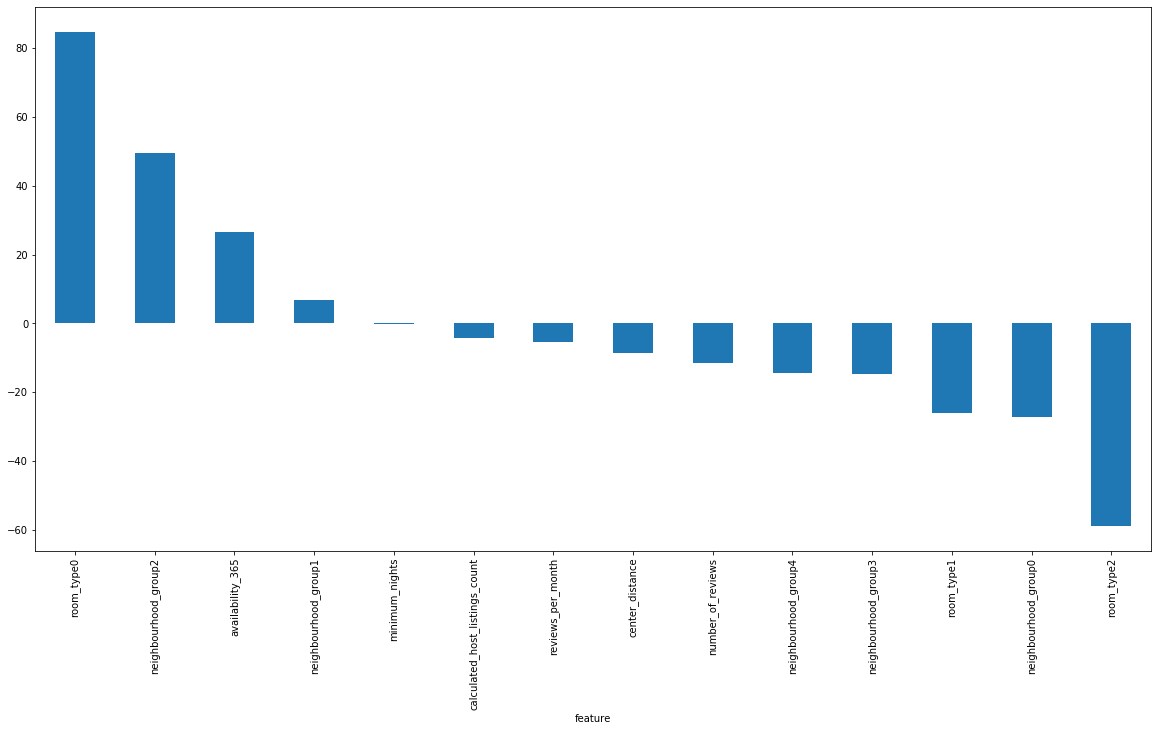

In [68]:
featureImportance = pd.DataFrame({"feature": column_names, 
                                  "importance": lin_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(20, 10));

As we see MSE is rather big. It's interesting how *center_distance* influences MSE value.

In [69]:
# apply StandardScaler
scaler_no_dist = StandardScaler()
X_numeric_no_dist_train = pd.DataFrame(scaler_no_dist.fit_transform(num_X_train.drop(columns=['center_distance'])))
X_numeric_no_dist_test = pd.DataFrame(scaler_no_dist.transform(num_X_test.drop(columns=['center_distance'])))
print(X_numeric_no_dist_train.shape, X_numeric_no_dist_test.shape)

(34226, 5) (14669, 5)


In [70]:
# StandardScaler removed index; put it back
X_numeric_no_dist_train.index = X_train.index
X_numeric_no_dist_test.index = X_test.index

In [71]:
# Add one-hot encoded columns to numerical features
OH_X_scaled_no_dist_train = pd.concat([X_numeric_no_dist_train, X_object_train], axis=1)
OH_X_scaled_no_dist_test = pd.concat([X_numeric_no_dist_test, X_object_test], axis=1)
print(OH_X_scaled_no_dist_train.shape, OH_X_scaled_test.shape)

(34226, 13) (14669, 14)


In [72]:
lin_reg_no_dist = LinearRegression()
lin_reg_no_dist.fit(OH_X_scaled_no_dist_train, y_train)
y_no_dist_pred = lin_reg_no_dist.predict(OH_X_scaled_no_dist_test)
print("\nMSE: {:.4f}".format(mean_squared_error(y_no_dist_pred, y_test)))


MSE: 43035.5368


Without *center_distance* MSE is slightly higher.

<a id="RidgeCV"></a>

### Ridge and RidgeCV

In [73]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(OH_X_scaled_train, y_train)
y_ridge_pred = ridge_reg.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', ridge_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_ridge_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_ridge_pred))

Coefficients: 
 [ -0.25489012 -11.52086781  -5.42781515  -4.09488739  26.443406
  -8.62795053 -27.15850901   6.88299161  49.41027604 -14.74179278
 -14.39296585  84.78455558 -25.91863434 -58.86592123]
Mean squared error: 43015.24
Coefficient of determination: 0.11


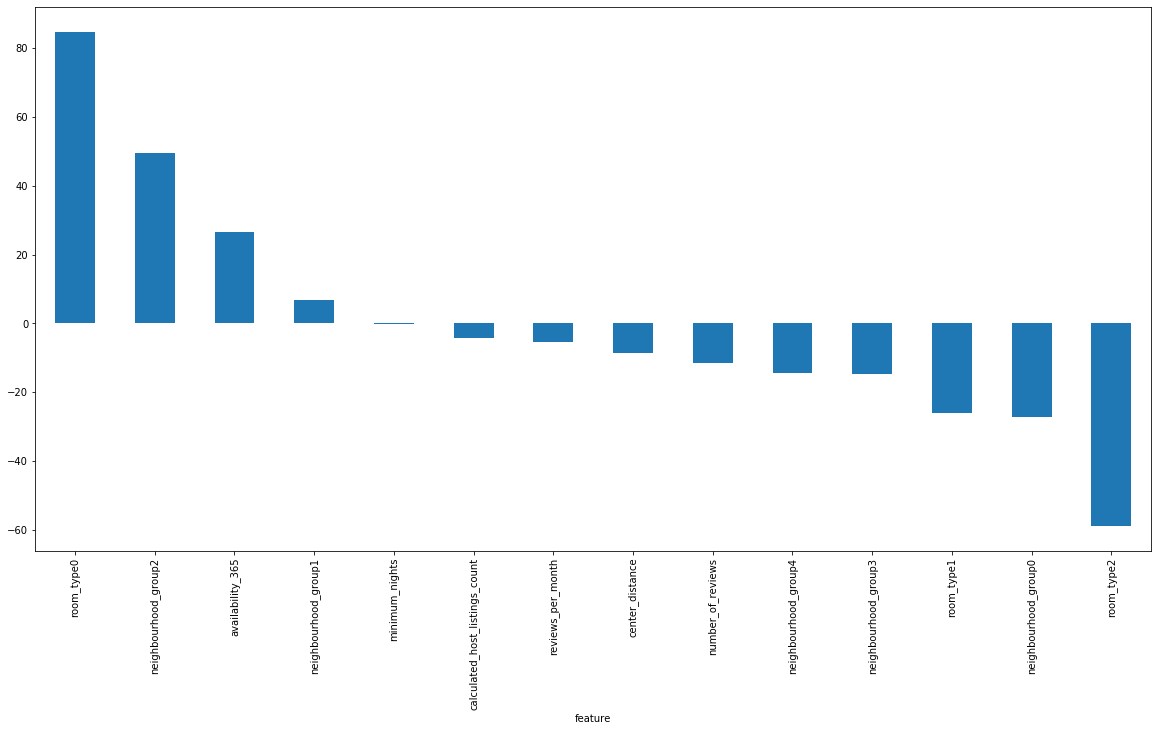

In [74]:
featureImportance = pd.DataFrame({"feature": column_names, 
                                  "importance": ridge_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(20, 10));

In [75]:
from sklearn.linear_model import RidgeCV
ridgecv_reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridgecv_reg.fit(OH_X_scaled_train, y_train)
y_ridgecv_pred = ridgecv_reg.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', ridgecv_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_ridgecv_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_ridgecv_pred))

Coefficients: 
 [ -0.25455474 -11.52031529  -5.4279321   -4.09407269  26.44221719
  -8.63063205 -27.15135366   6.87314363  49.39553097 -14.75053331
 -14.36678762  84.77064509 -25.92968589 -58.8409592 ]
Mean squared error: 43015.22
Coefficient of determination: 0.11


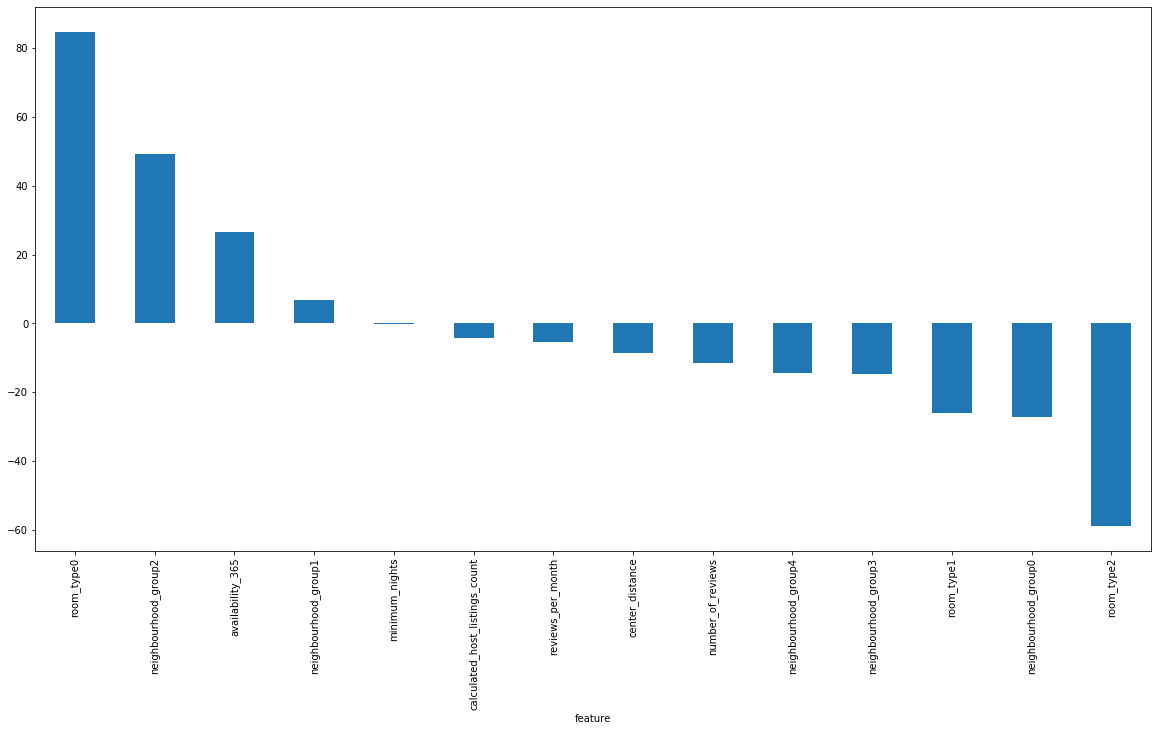

In [76]:
featureImportance = pd.DataFrame({"feature": column_names, 
                                  "importance": ridgecv_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(20, 10));

Ridge and RidgeCV (`43015.22`) doesn't affect MSE as compared to LinearRegression(`43015.25`).

<a id="LassoCV"></a>

### Lasso and LassoCV

In [88]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(OH_X_scaled_train, y_train)
y_lasso_pred = lasso_reg.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', lasso_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_lasso_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_lasso_pred))

Coefficients: 
 [-8.34166514e-02 -1.13627972e+01 -5.40190061e+00 -3.89186956e+00
  2.61310716e+01 -8.63387221e+00 -8.70819151e+00  2.05193466e+01
  6.30264065e+01 -0.00000000e+00 -0.00000000e+00  1.10592763e+02
 -0.00000000e+00 -2.87416518e+01]
Mean squared error: 43015.37
Coefficient of determination: 0.11


Lasso model quality looks like Ridge's (`43015.37`).

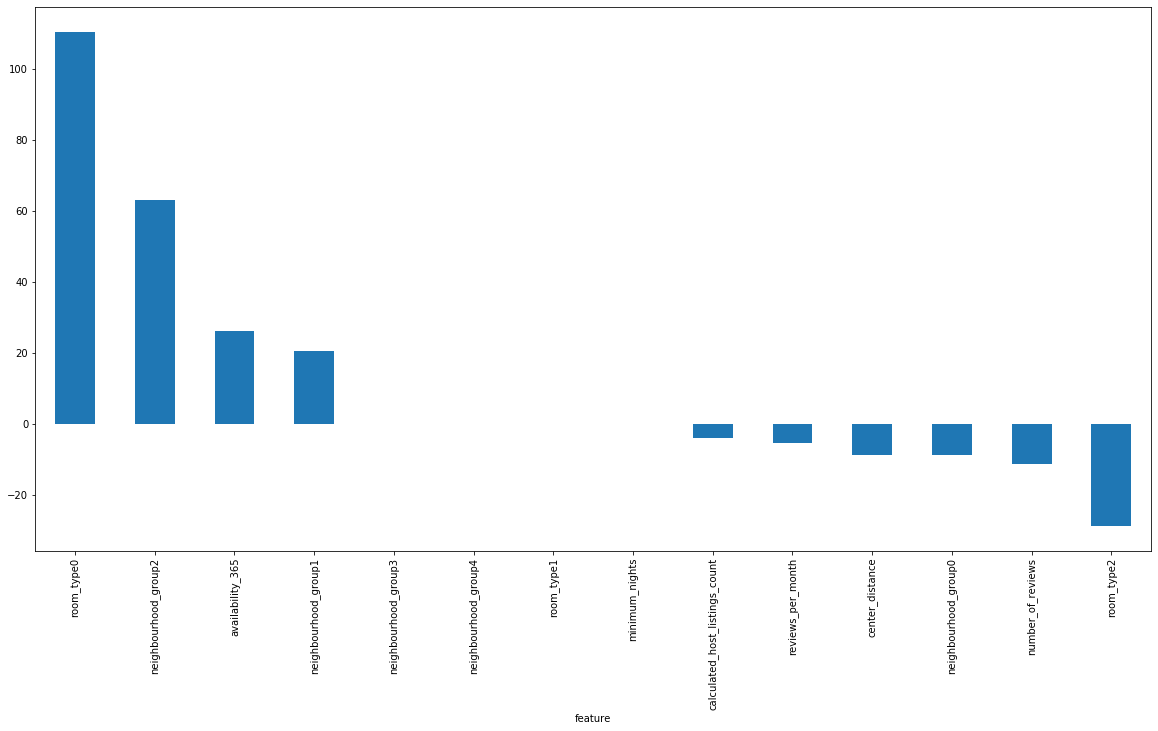

In [78]:
featureImportance = pd.DataFrame({"feature": column_names, 
                                  "importance": lasso_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(20, 10));

In [79]:
from sklearn.linear_model import LassoCV
lassocv_reg = LassoCV(cv=10)
lassocv_reg.fit(OH_X_scaled_train, y_train)
y_lassocv_pred = lassocv_reg.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', lassocv_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_lassocv_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_lassocv_pred))

Coefficients: 
 [-1.33779906e-01 -1.14093335e+01 -5.40955506e+00 -3.95178213e+00
  2.62231535e+01 -8.62914287e+00 -9.83031228e+00  2.08135466e+01
  6.33307793e+01 -2.33568167e-02 -0.00000000e+00  1.10626416e+02
  0.00000000e+00 -2.99862296e+01]
Mean squared error: 43015.14
Coefficient of determination: 0.11


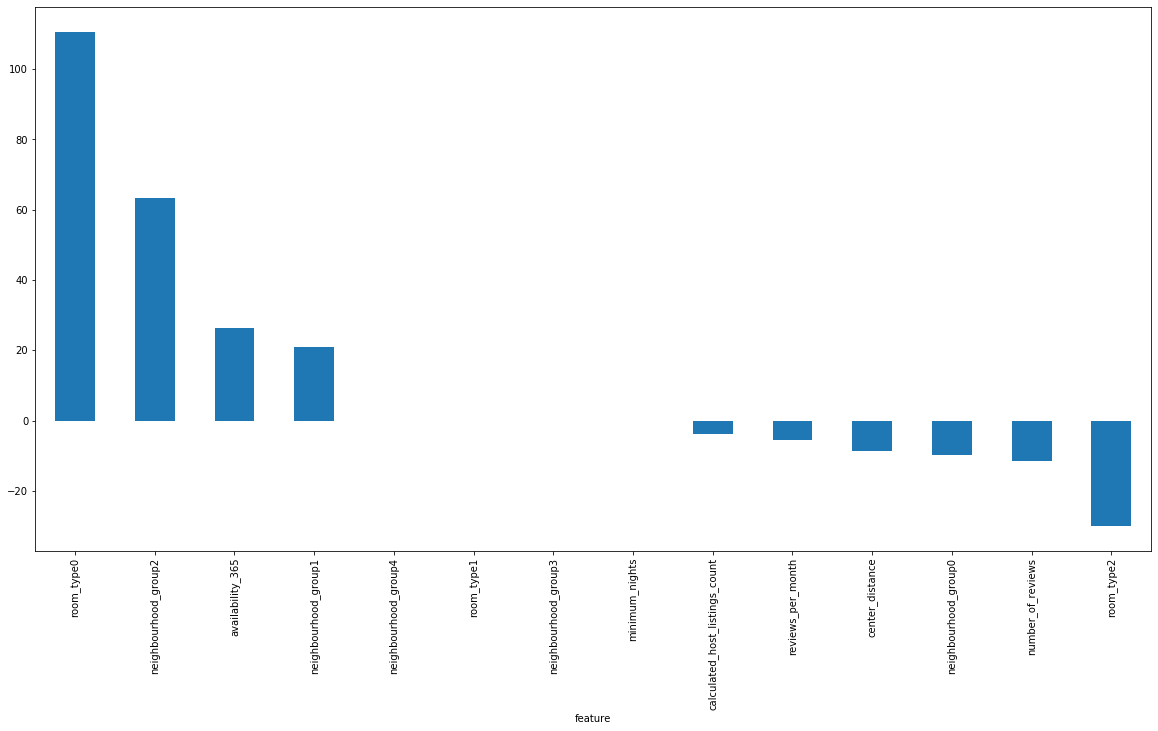

In [80]:
featureImportance = pd.DataFrame({"feature": column_names, 
                                  "importance": lassocv_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(20, 10));

<a id="ElasticNetCV"></a>

### ElasticNetCV

In [81]:
from sklearn.linear_model import ElasticNetCV
elastic_reg = ElasticNetCV(cv=10)
elastic_reg.fit(OH_X_scaled_train, y_train)
y_elastic_pred = elastic_reg.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', elastic_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_elastic_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_elastic_pred))

Coefficients: 
 [  0.27305784 -10.62294273  -5.63031337  -2.81253905  24.60855834
 -11.2292367  -14.26783811  -0.          36.80068334 -17.85758062
  -1.89563736  68.13647069 -36.55257827 -30.54346337]
Mean squared error: 43085.90
Coefficient of determination: 0.11


ElasticNetCV model quality is slightly worse than Lasso's. 

<a id="PolynomialFeatures"></a>

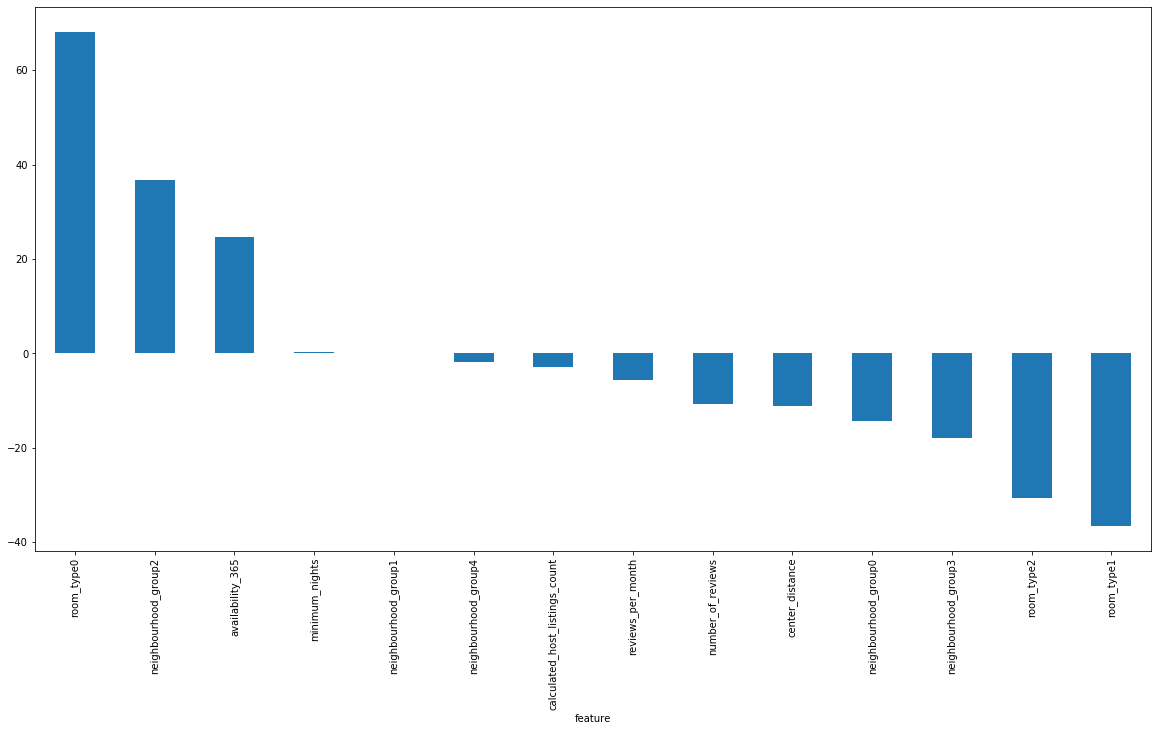

In [82]:
featureImportance = pd.DataFrame({"feature": column_names, 
                                  "importance": elastic_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(20, 10));

<a id = "PolynomialFeatures"></a>

### Polynomial Features

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polybig_features = PolynomialFeatures(degree = 2, include_bias=False)
ridge_reg = Ridge(alpha=0.5)
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("ridge_reg", ridge_reg),
    ])

polynomial_regression.fit(OH_X_scaled_train, y_train)
y_poly = polynomial_regression.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', ridge_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_poly))

Coefficients: 
 [ -7.9852569   -9.63652729  -8.77943751 -21.04643897   6.28099335
 -11.25726193 -16.3363763    0.19130356  12.3993885  -12.3121155
  16.05779975  28.71505076 -10.02359792 -18.69145284   0.21699741
   5.22943808 -15.77556047   0.30172541  -5.40500055   9.34362991
 -14.15592203  -7.65355718   4.55350287  25.52802002 -16.25730057
  -5.69677192  14.74235213 -17.03083711   2.51481506   0.33840167
 -26.57905562  -6.31710101  -1.22550713   0.9614016   -0.26025132
 -14.86371534  -2.19996179   6.72599956 -13.11651078  -1.21249906
   4.69248255   0.18818895   4.20255622  -2.06376393  -0.99767609
  -4.76409676  -1.52992851  -0.88022831   2.12600043  -3.73118437
  -3.75995081   3.47528217  -8.49476888   3.92220419 -12.8903994
  -0.67889515  34.97484606  -2.18948774 -14.85015314 -30.17036658
  -8.81127757  -2.96477151   6.95316106 -25.03482851  -1.02144184
   1.48186562  -4.38569647   4.99868601  23.97402687  -1.61283822
 -16.69318486  27.54511122  -2.01233212 -19.25178575   5.95622

PolynomialFeatures added to Ridge give us lower MSE result (`42120.27`) than ElasticNetCV model. 

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polybig_features = PolynomialFeatures(degree = 2, include_bias=False)
ridgecv_reg = RidgeCV()
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("ridgecv_reg", ridgecv_reg),
    ])

polynomial_regression.fit(OH_X_scaled_train, y_train)
y_poly = polynomial_regression.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', ridgecv_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_poly))

Coefficients: 
 [ -7.74988204  -9.41555692  -8.71540867 -22.20201385   6.42330616
 -10.46559678 -16.47136066   1.56503113  14.0527894  -10.81444329
  11.66798342  28.63729293 -10.1898066  -18.44748634   0.21716417
   5.15318146 -15.64985577   0.29124131  -5.40838972   9.27959798
 -13.43373957  -7.83180865   4.28619733  25.04246188 -15.81299303
  -5.65661792  14.74021824 -16.83348235   2.51899141   0.31809334
 -24.11221421  -6.33817675  -1.18588961   1.01395482  -0.23238642
 -14.72352046  -2.13179733   6.65819247 -12.96622477  -1.14984159
   4.70050943   0.19199367   3.87075586  -2.06825097  -1.0015526
  -4.86810261  -1.6239993   -0.99201808   1.97595354  -3.20724222
  -3.7817163    3.47537457  -8.40906694   3.9264245  -12.87761803
  -0.6054199   11.86107949   2.2792297   -9.76704928 -24.29312081
  -2.28215295  -5.8033007    3.77896281 -20.17767596  -1.02587913
   1.45598592  -4.37542359   4.72556325  23.62220293  -1.91185591
 -15.63718052  27.67903002  -1.85007731 -19.40564655   5.7469

Adding PolynomialFeatures increases quality of the RidgeCV model(MSE = `42120.88`).

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polybig_features = PolynomialFeatures(degree = 2, include_bias=False)
lassocv_reg = LassoCV(cv = 10)
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("lassocv_reg", lassocv_reg),
    ])

polynomial_regression.fit(OH_X_scaled_train, y_train)
y_poly = polynomial_regression.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', lassocv_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_poly))

Coefficients: 
 [-0.00000000e+00 -7.79010321e+00 -4.99428756e+00 -1.20612772e+01
  3.42157422e+00 -4.44801607e+00 -0.00000000e+00  0.00000000e+00
  2.95095969e+01 -5.59266361e+00 -0.00000000e+00  7.49258587e+01
 -0.00000000e+00 -0.00000000e+00  1.70544883e-01 -0.00000000e+00
 -2.06047174e+00 -1.26618878e+00 -4.22570393e+00  5.39367730e+00
 -0.00000000e+00 -5.16671465e+00  0.00000000e+00  6.28777480e+00
 -0.00000000e+00 -4.75009439e+00  9.66162168e+00 -0.00000000e+00
  2.08039733e+00  0.00000000e+00  0.00000000e+00 -5.76863601e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.22042140e+00
 -0.00000000e+00 -0.00000000e+00 -1.04061623e+01 -0.00000000e+00
  0.00000000e+00  2.76483622e-01  0.00000000e+00 -1.40737275e+00
 -1.31608575e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -5.46573653e+00  0.00000000e+00
 -0.00000000e+00  2.54248550e+00 -1.23432772e+01  1.56342579e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polybig_features = PolynomialFeatures(degree = 2, include_bias=False)
elastic_reg = ElasticNetCV(cv = 10)
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("elastic_reg", elastic_reg),
    ])

polynomial_regression.fit(OH_X_scaled_train, y_train)
y_poly = polynomial_regression.predict(OH_X_scaled_test)
# The coefficients
print('Coefficients: \n', elastic_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_poly))
#print('Score: \n', ridge_reg.score(OH_X_scales_test, y_test))

Coefficients: 
 [ 1.11906444e-01 -7.85854081e+00 -5.35506723e+00 -5.03442039e+00
  9.72238881e+00 -6.74750198e+00 -4.56886824e+00  7.08123492e-02
  1.33950641e+01 -7.82005234e+00 -7.69392411e-02  2.65169029e+01
 -1.59355860e+01 -9.58142638e+00  1.53589432e-01 -1.58985781e-01
 -4.04698052e+00 -1.32781313e+00 -4.16342439e+00  5.00091601e+00
 -0.00000000e+00 -4.64108589e+00  8.30340212e-01  5.60828507e+00
 -4.27152537e-02 -5.42886603e+00  7.68924407e+00 -1.47126630e-01
  1.95235086e+00 -1.69766305e-03  1.30138435e+00 -5.44432687e+00
  4.25966852e-01 -0.00000000e+00  1.16023015e-02 -8.05046062e+00
 -0.00000000e+00 -0.00000000e+00 -8.57557510e+00 -0.00000000e+00
  3.61502266e-01  3.13145820e-01  5.63256809e-01 -2.05507378e+00
 -7.44368997e-01 -9.99087913e-01 -0.00000000e+00 -1.45682800e+00
 -0.00000000e+00 -0.00000000e+00 -5.30741276e+00  4.12517512e-01
 -4.60621667e-01  2.55916375e+00 -1.01774971e+01  2.00365236e+00
  0.00000000e+00 -2.67666436e-01 -3.19510133e+00 -5.79313750e-01
  0.00000

PolynomialFeatures + ElasticNetCV have performed better than ElasticNetCV only. 

<a id="Conclusion"></a>

## 7. Conclusion

1. New York City Airbnb dataset is linearly non-separable. That's why I get rather big MSE after different linear models training. MSE values differ from one kernel start to another but general results remain the same. The best achieved coefficient of determination is `0.13`.
2. Adding *center_distance* feature slightly increases training quality.
3. According to feature importants plots the most important features are one of room types (most likely `Entire home/apt` according to pairplot), one of neighbourhood groop (most likely `Manhattan` according to pairplot) and availability.
4. Training quality is better when PolynomialFeatures are added.